# Sexual Behavior Notebook

### Imports

In [9]:
# Michaela Webster's Thesis Project #
""" This project aims to try to predict the outcome of security clearance appeals cases """

#use this link for scikit learn help: https://www.ritchieng.com/pandas-scikit-learn/

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# imports
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import shlex
import sklearn
from sklearn import metrics as skmet

### Getting the Training Data

In [19]:
#open sexual_query.csv as pandas dataframe - encoding must be latin-1
path_to_file = "C:\\Users\\maweb\\Documents\\ThesisCode\\sexual_query.csv"
data = pd.read_csv(path_to_file, encoding='latin-1')

df = data.groupby(['Sexual_Behavior', 'Denied']).size()
#print bar graph of sexual_behavior yes/no vs denied yes/no
print (df)

Sexual_Behavior  Denied
False            False      9460
                 True      10571
True             False       192
                 True        291
dtype: int64


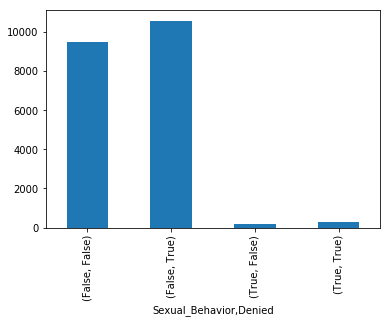

In [20]:
#print bar graph to show alcohol/denied
#cannot do this through cmd
df.plot.bar()

### Prime Data for Machine Learning

In [21]:
# set the featured columns for X (sexual behavior)
feature_cols = ['Domestic_Violence', 'Traumatic_Life_Event', 'Child_Sexual_Abuse', 'Child_Pornography', 'Prostitutes', 'Sexual_Behavior']
# you want all rows, and the feature_cols' columns
X = data.loc[:, feature_cols]
# now we want to create our response vector
y = data.Denied

### Feed the Data and Outcome into LogisticRegression Model

In [22]:
# START DOING MACHINE LEARNING STUFF
# 1. import
from sklearn.linear_model import LogisticRegression
# 2. instantiate model
logreg = LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear')
# 3. fit 
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=110, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
# FOR TEST DATA
#open sexual_test.csv as pandas dataframe
path_to_file = "C:\\Users\\maweb\\Documents\\ThesisCode\\sexual_test.csv"
data2 = pd.read_csv(path_to_file, encoding='latin-1')
X_new = data.loc[:, feature_cols]
new_pred_class = logreg.predict(X_new)

In [24]:
new_pred_class

array([ True,  True,  True, ...,  True,  True,  True])

### Find Model Accuracy

In [25]:
sexual_accuracy = skmet.accuracy_score(new_pred_class, y)

In [26]:
print('Accuracy Score for Sexual Behavior model: ',sexual_accuracy)

Accuracy Score for Sexual Behavior model:  0.5383640440674661


In [27]:
sexual_f1 = skmet.f1_score(y,new_pred_class)
print('F1 score for Sexual Behavior Model: ',sexual_f1)

F1 score for Sexual Behavior Model:  0.6945161290322581


### Future Work

1. look into more data points to add